In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [0]:
data = pd.read_csv('/content/ExamAnxiety.csv')

In [0]:
data.set_index(['Code'],drop=True,inplace=True)

In [31]:
data.head()

,Revise,Exam,Anxiety,Gender
Code,,,,
1,4,40,86.298,Male
2,11,65,88.716,Female
3,27,80,70.178,Male
4,53,80,61.312,Male
5,4,40,89.522,Male


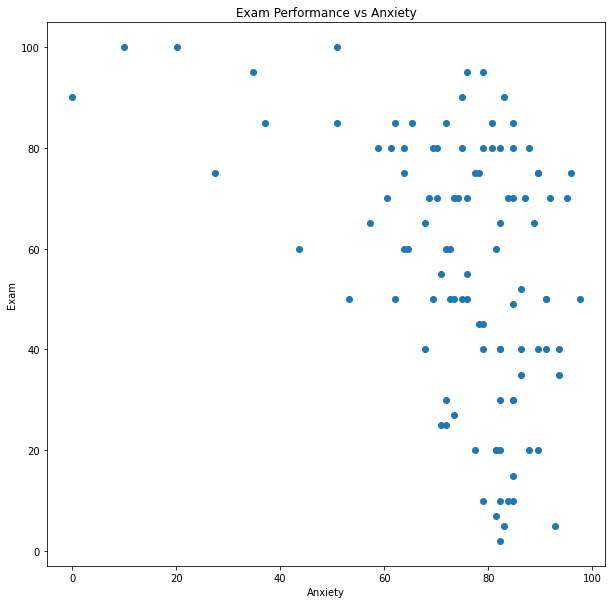

In [32]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
ax.set_xlabel('Anxiety')
ax.set_ylabel('Exam')
ax.set_title('Exam Performance vs Anxiety')
ax.scatter(data['Anxiety'], data['Exam'], marker = 'o')
plt.show()

In [33]:
corr_coeff = data['Exam'].corr(data['Anxiety'])
corr_coeff

-0.44099341160878863

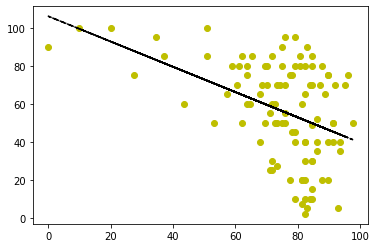

In [34]:
x = np.array(data['Anxiety'])
y = np.array(data['Exam'])
coef = np.polyfit(x,y, 1)
poly1d_fn = np.poly1d(coef)
plt.plot(x,y, 'yo',x, poly1d_fn(x), '--k')

In [39]:
model = sm.OLS.from_formula("Exam ~ Anxiety", data = data)
res = model.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Exam   R-squared:                       0.194
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     24.38
Date:                Tue, 12 May 2020   Prob (F-statistic):           3.13e-06
Time:                        18:05:28   Log-Likelihood:                -469.86
No. Observations:                 103   AIC:                             943.7
Df Residuals:                     101   BIC:                             949.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    106.0706     10.285     10.313      0.000      85.667     126.474
Anxiety       -0.6658      0.135     -4.938      0.000      -0.933      -0.398
==============================================================================
Omnibus:                        9.803   Durbin-Watson:                   2.065
Prob(Omnibus):                  0.007   Jarque-Bera (JB):                4.470
Skew:                          -0.262   Prob(JB):                        0.107
Kurtosis:                       2.124   Cond. No.                         340.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [40]:
coef

array([ -0.66579675, 106.07058954])

In [0]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/sandbox/predict_functional.py:171: ValueWarning: 'Gender', 'Revise' in data frame but not in summaries or values.
  ValueWarning)


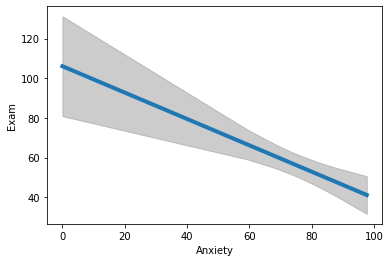

In [44]:
# The returned values are the predicted values (pr), the confidence bands (cb),
# and the function values (fv).
from statsmodels.sandbox.predict_functional import predict_functional
pr, cb, fv = predict_functional(res, "Anxiety", ci_method="simultaneous")
ax = sns.lineplot(fv, pr, lw=4)
ax.fill_between(fv, cb[:, 0], cb[:, 1], color='grey', alpha=0.4)
ax.set_xlabel("Anxiety")
_ = ax.set_ylabel("Exam")


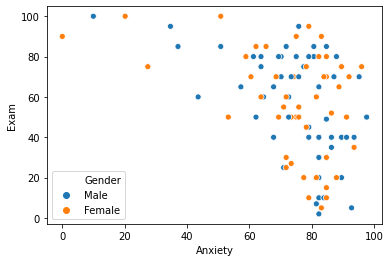

In [45]:
sns.scatterplot(x='Anxiety', y='Exam', hue='Gender', data=data, )

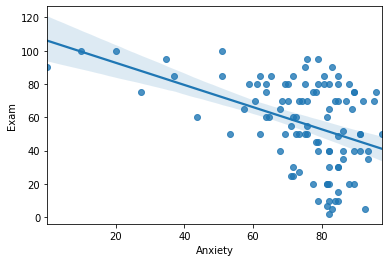

In [51]:
sns.regplot(x="Anxiety", y='Exam', data=data,order=1)

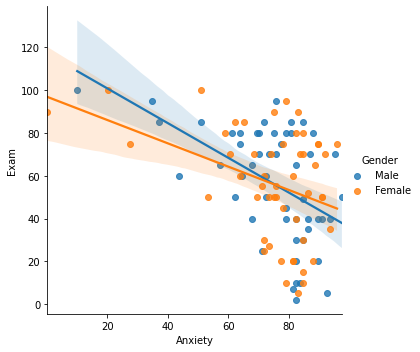

In [52]:
sns.lmplot(x='Anxiety', y='Exam', data=data, hue='Gender')